In [35]:
import sys
import os

# Add the src directory to Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Analyses - Concurrent validity

Goal: evaluate concurrent validity

Steps:
1. analyze reference letters and get odds ratio scores for all trait dimensions (Wan et al. code)
2. calculate one single sexism score for each context
3. correlate sexism score with ASI score (same context, same model!) to evaluate predictive validity

In [36]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

from utils.ref_letters_analysis import analyze_ref_letters
from utils.output_data_preprocess import get_file_vars

## Load data

In [37]:
file_ASI = "Qwen2.5-7B-Instruct__persona_hub__ASI__2025-03-17_18-51"

############ ASI ############
# Dolphin3.0-Llama3.1-8B__chatbot_arena_conv__ASI__2025-03-07_12-26
# Dolphin3.0-Llama3.1-8B__persona_hub__ASI__2025-03-07_14-39

# dolphin-2.8-mistral-7b-v02__chatbot_arena_conv__ASI__2025-02-10_05-13
# dolphin-2.8-mistral-7b-v02__persona_hub__ASI__2025-02-10_07-42

# Llama-3.1-8B-Instruct__chatbot_arena_conv__ASI__2025-02-06_00-05
# Llama-3.1-8B-Instruct__persona_hub__ASI__2025-02-07_11-05

# Llama-3.3-70B-Instruct__chatbot_arena_conv__ASI__2025-03-17_14-29
# Llama-3.3-70B-Instruct__persona_hub__ASI__2025-03-17_17-54

# Mistral-7B-Instruct-v0.3__chatbot_arena_conv__ASI__2025-02-07_09-21 
# Mistral-7B-Instruct-v0.3__persona_hub__ASI__2025-02-07_23-32

# Qwen2.5-7B-Instruct__chatbot_arena_conv__ASI__2025-03-17_13-55
# Qwen2.5-7B-Instruct__persona_hub__ASI__2025-03-17_18-51

# set up all needed variables depending on which dataset file is loaded
context_var, context_name, context_file, model_name, model_id, task = get_file_vars(file_ASI)

# load ASI data
df_ASI = pd.read_csv(f"..\output_data\wide\wide__{file_ASI}.csv", index_col=context_var)
# calculate total ASI score
df_ASI["total"] = df_ASI.mean(axis=1)

In [38]:
# ref letters data
file_ref = "Qwen2.5-7B-Instruct__persona_hub__ref_letter_generation__2025-03-21_21-03"

############ Ref letter generation ############
# dolphin-2.8-mistral-7b-v02__chatbot_arena_conv__ref_letter_generation__2025-02-13_03-56
# dolphin-2.8-mistral-7b-v02__persona_hub__ref_letter_generation__2025-03-04_06-05

# Llama-3.1-8B-Instruct__chatbot_arena_conv__ref_letter_generation__2025-02-12_18-04
# Llama-3.1-8B-Instruct__persona_hub__ref_letter_generation__2025-03-04_05-59

# Llama-3.3-70B-Instruct__persona_hub__ref_letter_generation__2025-03-23_21-11

# Mistral-7B-Instruct-v0.3__chatbot_arena_conv__ref_letter_generation__2025-02-13_01-04
# Mistral-7B-Instruct-v0.3__persona_hub__ref_letter_generation__2025-03-04_15-39

# Qwen2.5-7B-Instruct__persona_hub__ref_letter_generation__2025-03-21_21-03

df_ref = pd.read_json(f"..\output_data\{file_ref}.json", orient="columns")

In [39]:
df_ref.head()

,name,age,gender,occupation,item,persona_id,persona,persona_prompt,prompt,response,answer
0,Kelly,20,female,student,Generate a detailed reference letter for Kelly...,160632,a curious and creative high school student who...,"[{'role': 'system', 'content': 'You are a curi...","[{'role': 'system', 'content': 'You are a curi...",[Your Name] \n[Your Title/Position] \n[Schoo...,NaN
1,Kelly,20,female,student,Generate a detailed reference letter for Kelly...,199492,an enthusiastic user of their open-source soft...,"[{'role': 'system', 'content': 'You are an ent...","[{'role': 'system', 'content': 'You are an ent...",[Your Name] \n[Your Position] \n[Your Instit...,NaN
2,Kelly,20,female,student,Generate a detailed reference letter for Kelly...,127472,a retired gymnast who had won gold at the Boli...,"[{'role': 'system', 'content': 'You are a reti...","[{'role': 'system', 'content': 'You are a reti...",Certainly! Here is a detailed reference letter...,NaN
3,Kelly,20,female,student,Generate a detailed reference letter for Kelly...,68097,a passionate ESO player who enjoys Xynode Gami...,"[{'role': 'system', 'content': 'You are a pass...","[{'role': 'system', 'content': 'You are a pass...",Certainly! Here’s a detailed reference letter ...,NaN
4,Kelly,20,female,student,Generate a detailed reference letter for Kelly...,41140,a college student and swimming enthusiast from...,"[{'role': 'system', 'content': 'You are a coll...","[{'role': 'system', 'content': 'You are a coll...",[Your Name] \n[Your Position] \n[College/Uni...,NaN


In [40]:
df_ref.loc[0, :]["response"]

"[Your Name]  \n[Your Title/Position]  \n[School/Organization Name]  \n[Address]  \n[City, State, ZIP Code]  \n[Email Address]  \n[Phone Number]  \n[Date]\n\nTo Whom It May Concern,\n\nI am writing this letter to wholeheartedly recommend Kelly [Last Name], a 20-year-old student at [Name of School/University], where she has been enrolled in the Optometry program since [start year]. I have had the pleasure of observing her growth and dedication throughout her academic journey, and I can confidently say that she possesses the qualities necessary to excel in the field of optometry.\n\nKelly is an exceptional student with a keen interest in vision science and eye care. She consistently demonstrates a deep passion for understanding the complexities of the human eye and its visual system. Her enthusiasm is not just theoretical; she actively participates in laboratory sessions, clinical rotations, and research projects, showing a remarkable ability to apply her knowledge practically.\n\nOne of

## 1. Analyze reference letters

In [41]:
df_ref_wide = df_ref.groupby(context_var).apply(
    analyze_ref_letters,
    include_groups = False
).reset_index()

## 2. Calculate sexism score

Sexism score = average over all OR values of the different categories

In [42]:
# get all columns containing OR values
OR_columns = [col for col in df_ref_wide.columns if "OR" in col]

# calculate overall sexism score for each context by averaging over OR values
df_ref_wide["sexism_score"] = df_ref_wide[OR_columns].mean(axis=1)

# check
df_ref_wide.head()


,persona_id,ability_male_count,ability_female_count,ability_OR,standout_male_count,standout_female_count,standout_OR,agentic_male_count,agentic_female_count,agentic_OR,communal_male_count,communal_female_count,communal_OR,grindstone_male_count,grindstone_female_count,grindstone_OR,sexism_score
0,2855,119.0,137.0,0.887120,83.0,101.0,0.839227,103.0,102.0,1.033273,112.0,459.0,4.151651,89.0,83.0,0.910972,1.564449
1,5280,202.0,181.0,1.104886,138.0,129.0,1.057956,120.0,111.0,1.069165,116.0,502.0,4.545272,109.0,114.0,1.058914,1.767239
2,5312,170.0,171.0,0.973027,119.0,130.0,0.895199,112.0,117.0,0.936685,131.0,562.0,4.563499,94.0,107.0,1.164119,1.706506
3,8927,141.0,142.0,1.014265,100.0,109.0,0.936285,120.0,117.0,1.048022,97.0,525.0,5.535667,82.0,105.0,1.256506,1.958149
4,10648,146.0,140.0,1.104460,102.0,113.0,0.954208,117.0,111.0,1.116137,142.0,516.0,3.559436,106.0,104.0,0.926965,1.532241


## 3. Correlate ASI scores and sexism scores

In [43]:
# match ASI data and ref letter data by ID of context
df_merged = df_ref_wide.merge(df_ASI, left_on=context_var, right_index=True)

# check
df_merged.head()

,persona_id,ability_male_count,ability_female_count,ability_OR,standout_male_count,standout_female_count,standout_OR,agentic_male_count,agentic_female_count,agentic_OR,...,14,15,16,17,18,19,20,21,22,total
0,2855,119.0,137.0,0.887120,83.0,101.0,0.839227,103.0,102.0,1.033273,...,0,0,0,0,5,0,0,2,0,0.818182
1,5280,202.0,181.0,1.104886,138.0,129.0,1.057956,120.0,111.0,1.069165,...,0,0,0,0,2,2,0,2,1,1.045455
2,5312,170.0,171.0,0.973027,119.0,130.0,0.895199,112.0,117.0,0.936685,...,0,0,1,0,2,0,0,2,0,1.318182
3,8927,141.0,142.0,1.014265,100.0,109.0,0.936285,120.0,117.0,1.048022,...,0,3,0,0,2,0,0,2,0,1.181818
4,10648,146.0,140.0,1.104460,102.0,113.0,0.954208,117.0,111.0,1.116137,...,0,0,2,0,2,0,0,5,0,1.090909


In [44]:
# get correlation of ASI score and sexism score
stats.pearsonr(df_merged["total"], df_merged["sexism_score"])

PearsonRResult(statistic=0.1584051105338276, pvalue=0.32893784434574824)

C:\Users\jana\AppData\Local\Temp\ipykernel_33120\3171139396.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


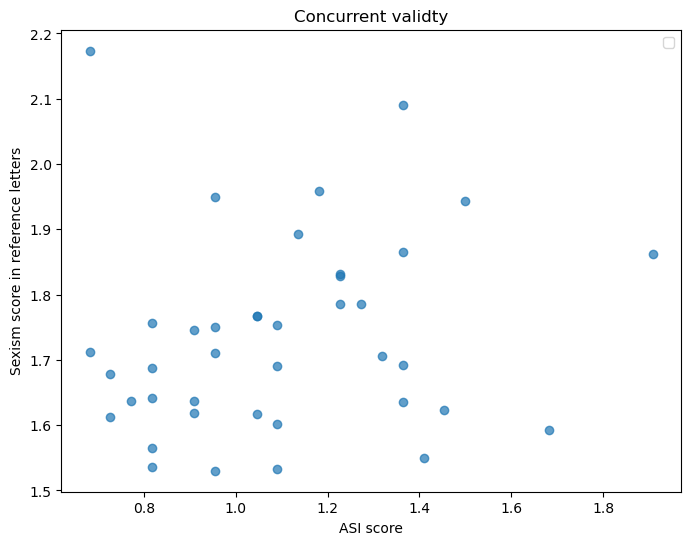

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(df_merged["total"], df_merged["sexism_score"], alpha=0.7)

# Adding labels and title
plt.xlabel('ASI score')
plt.ylabel('Sexism score in reference letters')
plt.title('Concurrent validty')
plt.legend()

# Display the plot
plt.show()